## Importing libraries and data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import geopandas as gpd
import numpy as np
from shapely.geometry import MultiPolygon, Point
from operator import attrgetter
import shapely

C:\Users\20194027\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\20194027\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
C:\Users\20194027\Anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
Airbnb_data = pd.read_csv('data/airbnb_open_data.csv')

C:\Users\20194027\AppData\Local\Temp\ipykernel_15912\4186480065.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  Airbnb_data = pd.read_csv('data/airbnb_open_data.csv')


## Research and clean data

All columns are checked and will be put in the same style (all lowercase, spaces instead of underscore). Further details are mentioned at each column.

In [3]:
for col in Airbnb_data.columns:
    print(col)

Unnamed: 0
id
NAME
host id
host_identity_verified
host name
neighbourhood group
neighbourhood
lat
long
country
country code
instant_bookable
cancellation_policy
room type
Construction year
price
service fee
minimum nights
number of reviews
last review
reviews per month
review rate number
calculated host listings count
availability 365
house_rules
license
point
region


In [4]:
len(Airbnb_data)

102599

#### ID

Id is very important, so this column should be handled first. There should only be unique id's, since this is the key value.

In [5]:
#There are no empty cells in the id column, which is promising
Airbnb_data[Airbnb_data['id'].isna()]

,Unnamed: 0,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,point,region


In [6]:
#The length of unique id's is 541 less than the total length, so one is listed double
len(Airbnb_data['id'].unique())

102058

Above we found out that there are id's that appear more than once. Research how

In [7]:
bnb_id = Airbnb_data.groupby('id')
bnb_count = bnb_id.count()
bnb_count['NAME'].unique()


array([1, 0, 2], dtype=int64)

In [8]:
bnb_count = bnb_count[bnb_count.isin([2]).any(axis=1)]
double_id = list(bnb_count.index)

In [9]:
Airbnb_data[Airbnb_data['id'].isin(double_id)].sort_values(by = 'id')

,Unnamed: 0,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,point,region
9098,9098,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.96030,...,2.0,6/8/2019,0.21,3.0,34.0,157.0,NaN,NaN,POINT (-73.9603 40.76222),Lenox_Hill_Roosevelt_Island
102474,102474,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.96030,...,2.0,6/8/2019,0.21,3.0,34.0,157.0,NaN,NaN,POINT (-73.9603 40.76222),Lenox_Hill_Roosevelt_Island
102475,102475,6026714,Close to East Side Hospitals- Modern 2 Bedroom...,31072202372,verified,Juliana,Manhattan,Upper East Side,40.76249,-73.96217,...,6.0,1/31/2019,0.14,3.0,34.0,67.0,"The quieter the better, but otherwise make you...",NaN,POINT (-73.96217 40.76249),Lenox_Hill_Roosevelt_Island
9099,9099,6026714,Close to East Side Hospitals- Modern 2 Bedroom...,31072202372,verified,Juliana,Manhattan,Upper East Side,40.76249,-73.96217,...,6.0,1/31/2019,0.14,3.0,34.0,67.0,"The quieter the better, but otherwise make you...",NaN,POINT (-73.96217 40.76249),Lenox_Hill_Roosevelt_Island
9100,9100,6027266,ACADIA Spacious 2 Bedroom Apt - Close to Hospi...,95854111798,verified,Juliana,Manhattan,Upper East Side,40.76021,-73.96157,...,10.0,11/18/2018,0.22,5.0,34.0,211.0,No Smoking No Pets,NaN,POINT (-73.96157 40.76021),Lenox_Hill_Roosevelt_Island
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62657,62657,35606797,Bright and Beautiful Top Floor Two Bedrooms,65331079885,unconfirmed,Frankie,Brooklyn,Carroll Gardens,40.68383,-73.99281,...,18.0,11/4/2021,0.63,2.0,1.0,3.0,NaN,NaN,POINT (-73.99281 40.68383),DUMBO_Vinegar_Hill_Downtown_Brooklyn_Boerum_Hill
102240,102240,35607349,Modern & Bright Queen Bedroom Midtown East,57770451783,unconfirmed,David,Manhattan,Upper East Side,40.76132,-73.96064,...,1.0,11/4/2021,0.25,3.0,4.0,307.0,NaN,NaN,POINT (-73.96064 40.76132),Lenox_Hill_Roosevelt_Island
62658,62658,35607349,Modern & Bright Queen Bedroom Midtown East,57770451783,unconfirmed,David,Manhattan,Upper East Side,40.76132,-73.96064,...,1.0,11/4/2021,0.25,3.0,4.0,307.0,NaN,NaN,POINT (-73.96064 40.76132),Lenox_Hill_Roosevelt_Island
102241,102241,35607902,Modern NEW Room|PRIVATE BATHROOM,7431680152,verified,Dariia & Jacob,Brooklyn,Bedford-Stuyvesant,40.68990,-73.94074,...,1.0,11/4/2021,0.25,2.0,10.0,365.0,NaN,NaN,POINT (-73.94074 40.6899),Stuyvesant_Heights


When checking, it seems like they are the same Airbnb, so drop the duplicates.

In [10]:
Airbnb_data.drop_duplicates(inplace=True)

#### Host id

The host id is the key value to identify the owner of the Airbnb, so this is also a very important value.

In [11]:
Airbnb_data[Airbnb_data['host id'].isna()]

,Unnamed: 0,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,point,region


#### Country and country code

In [12]:
Airbnb_data['country'].unique(), Airbnb_data['country code'].unique()

(array(['United States', nan], dtype=object), array(['US', nan], dtype=object))

All Airbnb's are in New York, and all values are either the same or missing, so these columns give no information

In [13]:
Airbnb_data.drop(['country', 'country code'], axis = 1, inplace = True)

#### Name

The name is a short description of the apartment/home. If it has no value, we have no description. We will have to discuss what to do with this. I suggest replacing it with 'No description'.

In [14]:
Airbnb_data.rename(columns = {'NAME': 'name'}, inplace=True)

In [15]:
Airbnb_data['name'].fillna('No description', inplace=True)

#### host_identity_verified

Host identity verified tells us whether the owner of the Airbnb is verified, meaning that they uploaded their Passport, ID or something similar. Airbnb uses this to ensure safety and trust. For guests, verification ensures that the Airbnb is no scam.

In [16]:
Airbnb_data.rename(columns = {'host_identity_verified': 'host identity verified'}, inplace=True)

In [17]:
Airbnb_data['host identity verified'].unique()

array(['unconfirmed', 'verified', nan], dtype=object)

Either the values are verified or unconfirmed (meaning not verified in my opinion). to clear this up, we might want to change unconfirmed to not verified and nan to 'missing' or 'unknown'.

In [18]:
Airbnb_data['host identity verified'].replace('unconfirmed', 'not verified', inplace=True)
Airbnb_data['host identity verified'].fillna('unknown', inplace=True)

#### Host name

Host name is nice for in the visualization, but missing values are not very impactful. These can be changed to 'Unknown' or something similar.

In [19]:
Airbnb_data['host name'].fillna('unknown', inplace=True)

#### Neighborhood and Neighborhood group

Neighborhood and neighborhood group are nice to know, but not the most important in my opinion. for the visualization, we use longitude and latitude, and we can represen in which neighborhoods they lie with those values alone. I'll leave it for now, but won't research it further.

#### longitude and latitude

Longitude and latitude are used to place the Airbnb's on the visualization. If one of these values are missing, I won't know a way to find the correct values, so I will remove these. I also will check if there are weird values that are way out of New York.

In [20]:
Airbnb_data[Airbnb_data['long'].isna()]

,Unnamed: 0,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,lat,long,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,point,region
779,779,1431578,"Large, furnished room in a 2 bedroom!",20368956893,not verified,Gibson,Brooklyn,Crown Heights,NaN,NaN,...,1.0,3/18/2017,0.04,2.0,1.0,41.0,- Weekly and monthly prices are much lower - P...,NaN,POINT EMPTY,NaN
785,785,1434892,Authentic NY Charming Artist Loft,66486085219,not verified,Bailey,Brooklyn,Greenpoint,NaN,NaN,...,14.0,6/19/2019,0.16,5.0,1.0,226.0,We live and let live - hoping that you'd be re...,NaN,POINT EMPTY,NaN
799,799,1442624,Huge room with private balcony,69386945815,verified,Hunt,Manhattan,East Village,NaN,NaN,...,1.0,5/6/2013,0.01,1.0,1.0,240.0,Expect respect for the family and the space--t...,NaN,POINT EMPTY,NaN
814,814,1450908,Decorators 5-Star Flat West Village,33280739304,verified,Watson,Manhattan,West Village,NaN,NaN,...,157.0,8/11/2016,1.71,4.0,1.0,61.0,"Please keep it clean, thats all we really ask ...",NaN,POINT EMPTY,NaN
843,843,1466925,Nice Private Room Beauty in Queens,15305733205,verified,Roberts,Queens,Elmhurst,NaN,NaN,...,63.0,5/18/2019,0.89,3.0,2.0,70.0,NaN,NaN,POINT EMPTY,NaN
885,885,1490122,Cute Room in Historic Loft!,42267829819,not verified,Jones,Brooklyn,Greenpoint,NaN,NaN,...,22.0,5/2/2019,0.25,1.0,1.0,266.0,"Pets are cool (just clean up after them!), smo...",NaN,POINT EMPTY,NaN
926,926,1512766,21 day Chelsea Apartment rental,10876728736,not verified,Owens,Manhattan,Flatiron District,NaN,NaN,...,0.0,NaN,NaN,2.0,1.0,104.0,NaN,NaN,POINT EMPTY,NaN
986,986,1545904,New York City for All Seasons!,26437872336,not verified,Douglas,Manhattan,Upper West Side,NaN,NaN,...,25.0,6/22/2013,0.28,2.0,1.0,259.0,No Smoking No Pets,NaN,POINT EMPTY,NaN


In [21]:
Airbnb_data[Airbnb_data['lat'].isna()]

,Unnamed: 0,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,lat,long,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,point,region
779,779,1431578,"Large, furnished room in a 2 bedroom!",20368956893,not verified,Gibson,Brooklyn,Crown Heights,NaN,NaN,...,1.0,3/18/2017,0.04,2.0,1.0,41.0,- Weekly and monthly prices are much lower - P...,NaN,POINT EMPTY,NaN
785,785,1434892,Authentic NY Charming Artist Loft,66486085219,not verified,Bailey,Brooklyn,Greenpoint,NaN,NaN,...,14.0,6/19/2019,0.16,5.0,1.0,226.0,We live and let live - hoping that you'd be re...,NaN,POINT EMPTY,NaN
799,799,1442624,Huge room with private balcony,69386945815,verified,Hunt,Manhattan,East Village,NaN,NaN,...,1.0,5/6/2013,0.01,1.0,1.0,240.0,Expect respect for the family and the space--t...,NaN,POINT EMPTY,NaN
814,814,1450908,Decorators 5-Star Flat West Village,33280739304,verified,Watson,Manhattan,West Village,NaN,NaN,...,157.0,8/11/2016,1.71,4.0,1.0,61.0,"Please keep it clean, thats all we really ask ...",NaN,POINT EMPTY,NaN
843,843,1466925,Nice Private Room Beauty in Queens,15305733205,verified,Roberts,Queens,Elmhurst,NaN,NaN,...,63.0,5/18/2019,0.89,3.0,2.0,70.0,NaN,NaN,POINT EMPTY,NaN
885,885,1490122,Cute Room in Historic Loft!,42267829819,not verified,Jones,Brooklyn,Greenpoint,NaN,NaN,...,22.0,5/2/2019,0.25,1.0,1.0,266.0,"Pets are cool (just clean up after them!), smo...",NaN,POINT EMPTY,NaN
926,926,1512766,21 day Chelsea Apartment rental,10876728736,not verified,Owens,Manhattan,Flatiron District,NaN,NaN,...,0.0,NaN,NaN,2.0,1.0,104.0,NaN,NaN,POINT EMPTY,NaN
986,986,1545904,New York City for All Seasons!,26437872336,not verified,Douglas,Manhattan,Upper West Side,NaN,NaN,...,25.0,6/22/2013,0.28,2.0,1.0,259.0,No Smoking No Pets,NaN,POINT EMPTY,NaN


The longitude and latitude are missing for 8 Airbnb's, in all 8 cases they are missing for both. For the rest, it looks like all values are decent, but this is not fixable for us, so these will be removed.

In [22]:
Airbnb_data = Airbnb_data[Airbnb_data['long'].notna()]

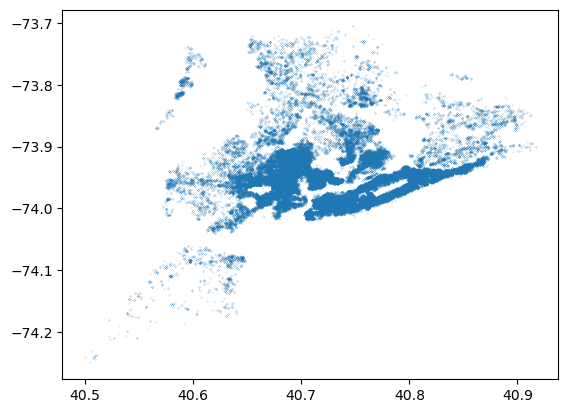

In [23]:
plt.scatter(x='lat', y='long', s=0.01, data=Airbnb_data);

There don't appear to be strange outliers in this image, so my guess is that the longitude and latitude values are correct.

#### Instant bookable

Instant bookable is a boolean, whether the room is free at this time. If this value is missing, replace it with 'Unknown'.

In [24]:
Airbnb_data.rename(columns = {'instant_bookable': 'instant bookable'}, inplace=True)

C:\Users\20194027\AppData\Local\Temp\ipykernel_15912\2903284214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data.rename(columns = {'instant_bookable': 'instant bookable'}, inplace=True)


In [25]:
Airbnb_data['instant bookable'].fillna('Unknown', inplace=True)

C:\Users\20194027\AppData\Local\Temp\ipykernel_15912\4190922403.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data['instant bookable'].fillna('Unknown', inplace=True)


#### cancellation policy

Cancellation policy shows how strict the host is when the guest wants to cancel their reservation. In the dictionary, this variable isn't given, so I don't know what influences the strictness level given to the Airbnb's. For now, change nan to Unknown (again).

In [26]:
Airbnb_data.rename(columns = {'cancellation_policy': 'cancellation policy'}, inplace=True)

C:\Users\20194027\AppData\Local\Temp\ipykernel_15912\414142879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data.rename(columns = {'cancellation_policy': 'cancellation policy'}, inplace=True)


In [27]:
Airbnb_data['cancellation policy'].unique()

array(['strict', 'moderate', 'flexible', nan], dtype=object)

In [28]:
Airbnb_data['cancellation policy'].fillna('unknown', inplace=True)

C:\Users\20194027\AppData\Local\Temp\ipykernel_15912\2600554664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data['cancellation policy'].fillna('unknown', inplace=True)


#### room type

Room type describes what kind of home the Airbnb is. All rows have a clear value, so nothing has to be done.

In [29]:
Airbnb_data['room type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

#### construction year

Construction year is not in the dict. I think the year the Airbnb was added on Airbnb, since the lowest value is 2004. filling nan will result in the values becoming 2020.0 for example, and turning into an int will not work if nan is filled, so need to look at this.

In [30]:
Airbnb_data.rename(columns = {'Construction year': 'construction year'}, inplace=True)

C:\Users\20194027\AppData\Local\Temp\ipykernel_15912\3631912237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data.rename(columns = {'Construction year': 'construction year'}, inplace=True)


In [31]:
Airbnb_data['construction year'].unique()

array([2020., 2007., 2005., 2009., 2013., 2015., 2004., 2008., 2010.,
       2019., 2018., 2006., 2016., 2017., 2021., 2003., 2011., 2012.,
       2022., 2014.,   nan])

#### Price

Another tricky one. The Airbnb's with no price are gonna give problems when filtering on price, and not showing the price when somebody hovers over an Airbnb feels wrong. Drop them? Should discuss this.

In [32]:
Airbnb_data[Airbnb_data['price'].isna()]

,Unnamed: 0,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,lat,long,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,point,region
147,147,1082524,Retreat in Williamsburg,22731046418,verified,Abraham,Brooklyn,Williamsburg,40.71492,-73.95935,...,240.0,6/17/2019,2.19,3.0,1.0,337.0,Leave shoes by door No strong scents (perfumes...,NaN,POINT (-73.95935 40.71492),North_Side_South_Side
148,148,1083076,NYC Zen,83696952551,verified,Amelia,NaN,East Village,40.72354,-73.98295,...,30.0,6/17/2019,0.28,5.0,1.0,344.0,No Smoking No Pets No Parties,NaN,POINT (-73.98295 40.72354),East_Village
210,210,1117319,Private Garden Apt • New Renovation,760769897,unknown,Ryan,Brooklyn,Williamsburg,40.71625,-73.93845,...,253.0,7/2/2019,3.04,3.0,1.0,124.0,Just general respect for the place and my neig...,NaN,POINT (-73.93845 40.71625),East_Williamsburg
211,211,1117871,Modern comfort in art infused landmark Brownstone,25801284480,unknown,Tiana,Brooklyn,Bedford-Stuyvesant,40.68290,-73.93549,...,23.0,7/1/2019,0.22,5.0,1.0,137.0,"Enjoy your stay, and please take care of the a...",NaN,POINT (-73.93549 40.6829),Stuyvesant_Heights
212,212,1118424,"NOHO/EAST VILLAGE, PRIVATE 1/2 BATH",62325020363,unknown,Perkins,Manhattan,NoHo,40.72773,-73.99134,...,115.0,12/5/2018,1.17,2.0,1.0,192.0,SMOKING: Not allowed anywhere on the property!...,NaN,POINT (-73.99134 40.72773),West_Village
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102046,102046,57361342,Sunny budget friendly room in Bushwick,29964876857,verified,unknown,Brooklyn,Bushwick,40.69370,-73.91006,...,3.0,4/9/2018,0.11,1.0,1.0,0.0,Please be mindful that I live in the same buil...,NaN,POINT (-73.91006 40.6937),Bushwick_North
102047,102047,57361894,"Cozy Apartment on Bedford Ave, Brooklyn",92852058426,not verified,unknown,Brooklyn,Williamsburg,40.71284,-73.96284,...,15.0,1/1/2018,0.55,4.0,1.0,0.0,NaN,NaN,POINT (-73.96284 40.71284),North_Side_South_Side
102048,102048,57362446,Your 1 bedroom home away from home!,95572379802,verified,unknown,Manhattan,Upper West Side,40.79563,-73.97634,...,38.0,6/10/2019,1.40,3.0,1.0,31.0,NaN,NaN,POINT (-73.97634 40.79563),Upper_West_Side
102049,102049,57362999,MASTER Cozy Bedroom Queen size 2 blocks Timesq...,80154173698,verified,unknown,Manhattan,Hell's Kitchen,40.76125,-73.98945,...,81.0,3/5/2019,2.96,2.0,2.0,0.0,- I work at home and prefer to rent to folks w...,NaN,POINT (-73.98945 40.76125),Clinton


In [34]:
Airbnb_data['price'] = Airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)


C:\Users\20194027\AppData\Local\Temp\ipykernel_15912\393048937.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Airbnb_data['price'] = Airbnb_data['price'].replace('[\$,]', '', regex=True).astype(float)


#### service fee

Service fee is a fee on top of the price, no explanation in dict. same things as for price.

In [36]:
Airbnb_data['service fee'] = Airbnb_data['service fee'].str.replace('$', '')
pd.to_numeric(Airbnb_data['service fee'], errors='coerce')

AttributeError: Can only use .str accessor with string values!

#### minimum nights

The minimum amount of noghts you need to book. NaN is not the biggest deal, but should be fixed. change to unknown again?

In [37]:
Airbnb_data[Airbnb_data['minimum nights'].isna()]

,Unnamed: 0,id,name,host id,host identity verified,host name,neighbourhood group,neighbourhood,lat,long,...,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license,point,region
46,46,1026742,Entire apartment in central Brooklyn neighborh...,41615406010,unknown,David,Brooklyn,Prospect-Lefferts Gardens,40.65944,-73.96238,...,11.0,6/5/2019,0.49,NaN,1.0,353.0,NaN,NaN,POINT (-73.96238 40.65944),Prospect_Lefferts_Gardens_Wingate
47,47,1027294,"1 Stop fr. Manhattan! Private Suite,Landmark B...",81253735818,not verified,Victoria,Queens,Long Island City,40.74771,-73.94740,...,248.0,7/1/2019,2.25,NaN,1.0,26.0,"The room is strictly non-smoking, however, you...",NaN,POINT (-73.9474 40.74771),Hunters_Point_Sunnyside_West_Maspeth
48,48,1027846,Charming Brownstone 3 - Near PRATT,42134614458,verified,Jared,Brooklyn,Bedford-Stuyvesant,40.68111,-73.95591,...,61.0,5/25/2019,0.52,NaN,1.0,32.0,"No smoking, please. No drugs or guns allowed. ...",NaN,POINT (-73.95591 40.68111),Clinton_Hill
49,49,1028399,bright and stylish duplex,53466382920,verified,Chloe,Brooklyn,Bedford-Stuyvesant,40.68554,-73.94090,...,11.0,1/1/2017,0.10,1.0,1.0,85.0,No smoking. No pet. No shoes in the house. Vis...,NaN,POINT (-73.9409 40.68554),Stuyvesant_Heights
50,50,1028951,Fort Greene brownstone,49393946881,not verified,Abraham,Brooklyn,Fort Greene,40.69142,-73.97376,...,135.0,6/17/2019,1.16,1.0,2.0,NaN,"We limit number of guests not staying, so plea...",NaN,POINT (-73.97376 40.69142),Fort_Greene
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102254,102254,13976520,Entire apartment 2 beds/2baths with Rooftop !,65863488278,verified,Sandra,Manhattan,Harlem,40.80545,-73.95489,...,3.0,12/31/2017,0.12,3.0,1.0,0.0,NaN,NaN,POINT (-73.95489 40.80545),Central_Harlem_South
102255,102255,13977072,King size room in foodie heaven!,3470529701,not verified,Michael,Queens,Astoria,40.77084,-73.92601,...,0.0,NaN,NaN,1.0,1.0,0.0,NaN,NaN,POINT (-73.92601 40.77084),Old_Astoria
102256,102256,13977625,Large private room in a nice apartment,49747569066,not verified,Miriam,Manhattan,Harlem,40.82634,-73.95061,...,18.0,1/6/2019,0.75,5.0,1.0,179.0,NaN,NaN,POINT (-73.95061 40.82634),Hamilton_Heights
102257,102257,13978177,2bed Williamsburg Loft w Roof Access + City Views,2151054051,not verified,Ashley,Brooklyn,Williamsburg,40.72059,-73.95847,...,42.0,11/4/2018,1.71,1.0,1.0,0.0,No Smoking No Pets,NaN,POINT (-73.95847 40.72059),North_Side_South_Side


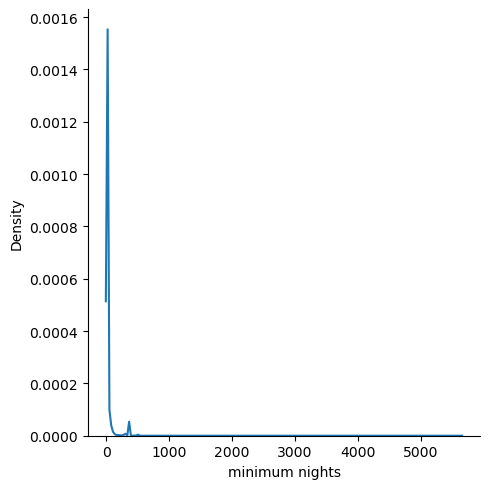

In [38]:
sns.displot(data = Airbnb_data, x = 'minimum nights', kind = 'kde')

In [39]:
Airbnb_data['minimum nights'].max()

5645.0

this can't be correct, so for now drop every value above 365 (maybe change to nan, discuss)

In [40]:
Airbnb_data = Airbnb_data[Airbnb_data['minimum nights'] <= 365]

#### Nr of reviews

First research more review info, if everything from reviews is missing from the same rows, it can all be changed to 'no reviews'. Otherwise it will become tricky.

In [41]:
rev1 = Airbnb_data[Airbnb_data['number of reviews'].isna()]
len(rev1)

181

In [42]:
rev2 = Airbnb_data[(Airbnb_data['number of reviews'].isna()) & (Airbnb_data['last review'].isna())]
len(rev2)

123

the cells above show that there are some cells where we don't know the amount of reviews, but there is at least one review

In [43]:
rev3 = Airbnb_data[(Airbnb_data['number of reviews'].isna()) & (Airbnb_data['reviews per month'].isna())]
len(rev3)

123

In [44]:
rev4 = Airbnb_data[(Airbnb_data['number of reviews'].isna()) & (Airbnb_data['reviews per month'].isna()) & (Airbnb_data['last review'].isna())]
len(rev4)

123

This shows that the rows where last review has a value, also has a value for the reviews per month. We can make an estimation for the amount of reviews with the construction year, but this will be an estimation (and i can't be bothered at the moment)

We should discuss what exactly we want to do with these columns, so I won't change them any further for now.

The other columns aren't too interesting in my opinion, so NaN values can just be turned to unknown or whatever. Problem for later.

## Add data

In [46]:
df = gpd.read_file('data/nyc.geojson')
Airbnb_data['point'] = Airbnb_data.apply(lambda row: Point(row.long, row.lat), axis=1)

df_plot = pd.read_csv('data/apparments_per_region.csv',
                     index_col=0, low_memory=False)

def add_region_columns(data: pd.DataFrame):
    data['region'] = None
    for index in tqdm(df.index):
        current_polygon_name = df.loc[index, 'id']
        current_polygon = df.loc[index, 'geometry']
        if index == 0:
            print(type(current_polygon))
        data['inter_region'] = data['point'].apply(lambda x: current_polygon.contains(x))
        data['region'] = np.where(
            data['inter_region'] == True, current_polygon_name, data['region'])
        data.drop('inter_region', axis=1, inplace=True)
    return data

data = add_region_columns(Airbnb_data)
data.to_csv('data/airbnb_open_data.csv')

df['appartment_count'] = df['id'].map(dict(data.region.value_counts()))
df_plot = df[['id', 'appartment_count', 'geometry']]
df_plot.to_csv('data/appartments_per_region.csv')

  0%|          | 0/188 [00:00<?, ?it/s]

<class 'shapely.geometry.multipolygon.MultiPolygon'>


100%|██████████| 188/188 [02:23<00:00,  1.31it/s]


In [47]:
import json
with open('data/nyc.geojson') as f:
    geo_json = json.load(f)


with open('data/Subway Lines.geojson') as f:
    geo_subway = json.load(f)
geo_subway['features']
df_attraction = gpd.read_file('data/attraction_point.geojson')

geo_json['features'].append(geo_subway['features'])
